In [1]:
library(tidyverse)

survey_data <- read_csv("../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Rows: 23998 Columns: 296
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (296): Duration (in seconds), Q2, Q3, Q4, Q5, Q6_1, Q6_2, Q6_3, Q6_4, Q6...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Questions

Based on reading through the survey questions, here are the ones that jumped out at me as the most intriguing. 

Very Interested:
- NLP Representations question (20)
- favourite sources for learning (44)
- What educational resources did people try (q6) vs what did they find most helpful for educational resources (q7)


Kinda Curious:
- Research (q9), on ml (q10)?
- Years using ML Methods (q16)
- Job Titles (23) vs job activities (28)
- $$$ (29)
- "ethical ai products" (41)


In [2]:
survey_data %>%
    select(starts_with("Q20"))

Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)","Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - Encoder-decoder models (seq2seq, vanilla transformers)","Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - Contextualized embeddings (ELMo, CoVe)","Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - Transformer language models (GPT-3, BERT, XLnet, etc)",Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - None,Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - Other
NA,nan,NA,NA,NA,NA
NA,nan,NA,NA,NA,NA
NA,nan,NA,NA,NA,NA
"Word embeddings/vectors (GLoVe, fastText, word2vec)","Encoder-decoder models (seq2seq, vanilla transformers)",NA,"Transformer language models (GPT-3, BERT, XLnet, etc)",NA,NA
NA,nan,NA,NA,NA,NA
NA,nan,NA,NA,NA,NA
NA,nan,NA,NA,NA,NA
"Word embeddings/vectors (GLoVe, fastText, word2vec)","Encoder-decoder models (seq2seq, vanilla transformers)",NA,"Transformer language models (GPT-3, BERT, XLnet, etc)",NA,NA


In [3]:
survey_data %>%
    select(Q20_6) %>%
table()

.
                                                                                                                                             Other 
                                                                                                                                               126 
Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other 
                                                                                                                                                 1 

## Most Used Methods

Warning message:
“attributes are not identical across measure variables;
they will be dropped”
Warning message in `!=.default`(value, c("nan", "None")):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


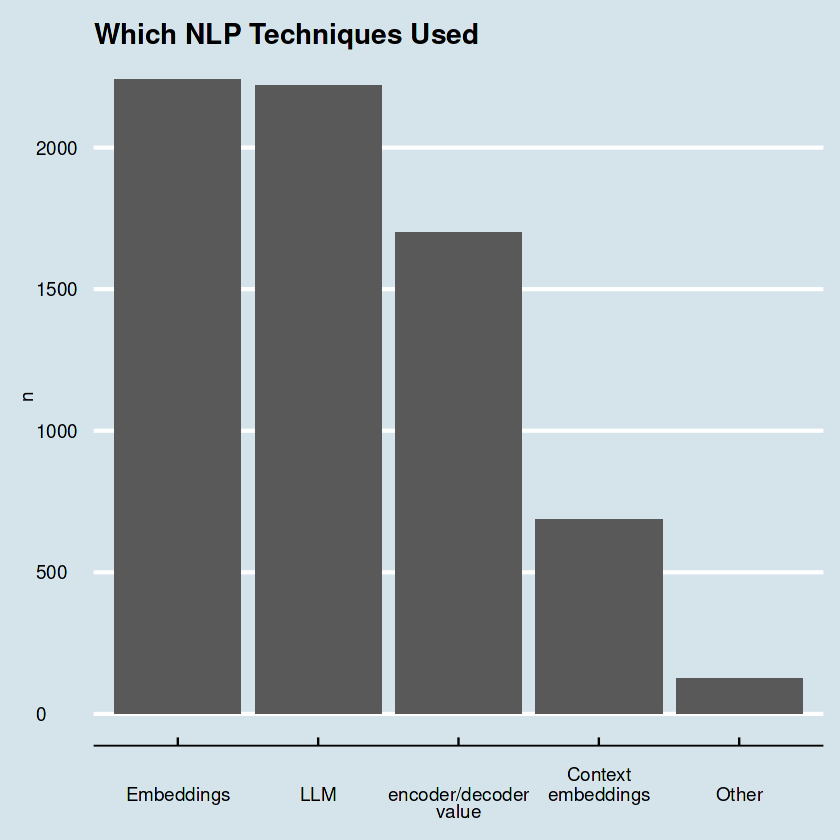

In [4]:
#method by number of respondents who had used them
library(ggthemes)

   survey_data %>%
      select(starts_with("Q20")) %>%
      slice(-1) %>%
      mutate_if(is.character,as.factor) %>%
      gather("question_no", "value", na.rm=T) %>%
      count(value) %>%
      mutate(value = reorder(value,-n)) %>%

      filter(value != c("nan", "None")) %>%
      mutate(value=recode(value, "Contextualized embeddings (ELMo, CoVe)" = "Context\nembeddings", 
                          "Encoder-decoder models (seq2seq, vanilla transformers)"="encoder/decoder", 
                          "Transformer language models (GPT-3, BERT, XLnet, etc)" = "LLM", 
                          "Word embeddings/vectors (GLoVe, fastText, word2vec)" = "Embeddings"))%>%
      ggplot(aes(x=value, y=n))+ 
      geom_bar(stat="identity") + 
      theme_economist()+
ggtitle("Which NLP Techniques Used")

In [5]:
#marginal NLP Techniques
survey_data %>%
    select(starts_with("Q20")) %>%
    mutate_if(is.character,as.factor) %>%
    group_by_all()%>%
    summarise(n())

`summarise()` has grouped output by 'Q20_1', 'Q20_2', 'Q20_3', 'Q20_4',
'Q20_5'. You can override using the `.groups` argument.


Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,n()
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
"Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)","Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - Encoder-decoder models (seq2seq, vanilla transformers)","Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - Contextualized embeddings (ELMo, CoVe)","Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - Transformer language models (GPT-3, BERT, XLnet, etc)",Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - None,Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice - Other,1
"Word embeddings/vectors (GLoVe, fastText, word2vec)","Encoder-decoder models (seq2seq, vanilla transformers)","Contextualized embeddings (ELMo, CoVe)","Transformer language models (GPT-3, BERT, XLnet, etc)",NA,Other,12
"Word embeddings/vectors (GLoVe, fastText, word2vec)","Encoder-decoder models (seq2seq, vanilla transformers)","Contextualized embeddings (ELMo, CoVe)","Transformer language models (GPT-3, BERT, XLnet, etc)",NA,NA,383
"Word embeddings/vectors (GLoVe, fastText, word2vec)","Encoder-decoder models (seq2seq, vanilla transformers)","Contextualized embeddings (ELMo, CoVe)",NA,NA,Other,2
"Word embeddings/vectors (GLoVe, fastText, word2vec)","Encoder-decoder models (seq2seq, vanilla transformers)","Contextualized embeddings (ELMo, CoVe)",NA,NA,NA,49
"Word embeddings/vectors (GLoVe, fastText, word2vec)","Encoder-decoder models (seq2seq, vanilla transformers)",NA,"Transformer language models (GPT-3, BERT, XLnet, etc)",NA,Other,8
"Word embeddings/vectors (GLoVe, fastText, word2vec)","Encoder-decoder models (seq2seq, vanilla transformers)",NA,"Transformer language models (GPT-3, BERT, XLnet, etc)",NA,NA,495
"Word embeddings/vectors (GLoVe, fastText, word2vec)","Encoder-decoder models (seq2seq, vanilla transformers)",NA,NA,NA,Other,7
"Word embeddings/vectors (GLoVe, fastText, word2vec)","Encoder-decoder models (seq2seq, vanilla transformers)",NA,NA,NA,NA,254


In [6]:
survey_data %>%
    select(starts_with("Q20")) %>%
    mutate_if(is.character,as.factor) %>%
    summarise("NA" =n())

NA
<int>
23998


## Preferred Learning Materials (Question 44)

In [7]:
survey_data %>%
   select(starts_with("Q44"))

Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers),"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Email newsletters (Data Elixir, O'Reilly Data & AI, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (notebooks, forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, Coursera forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Twitter (data science influencers),"Email newsletters (Data Elixir, O'Reilly Data & AI, etc)",NA,"Kaggle (notebooks, forums, etc)",NA,"YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)",NA,NA,NA,NA,NA
Twitter (data science influencers),NA,NA,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums, etc)",NA,NA,"Blogs (Towards Data Science, Analytics Vidhya, etc)",NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,"Blogs (Towards Data Science, Analytics Vidhya, etc)",NA,NA,NA,NA
NA,NA,NA,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums, etc)","YouTube (Kaggle YouTube, Cloud AI Adventures, etc)",NA,"Blogs (Towards Data Science, Analytics Vidhya, etc)",NA,NA,NA,NA
NA,NA,NA,NA,NA,"YouTube (Kaggle YouTube, Cloud AI Adventures, etc)",NA,"Blogs (Towards Data Science, Analytics Vidhya, etc)",NA,NA,NA,NA
Twitter (data science influencers),"Email newsletters (Data Elixir, O'Reilly Data & AI, etc)","Reddit (r/machinelearning, etc)",NA,NA,"YouTube (Kaggle YouTube, Cloud AI Adventures, etc)",NA,"Blogs (Towards Data Science, Analytics Vidhya, etc)",NA,NA,NA,NA


In [8]:
   survey_data %>%
      select(starts_with("Q44")) %>%
      slice(-1) %>%
      mutate_if(is.character,as.factor) %>%
      gather("question_no", "value", na.rm=T) %>%
      count(value)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”


value,n
<chr>,<int>
"Blogs (Towards Data Science, Analytics Vidhya, etc)",7766
"Course Forums (forums.fast.ai, Coursera forums, etc)",4006
"Email newsletters (Data Elixir, O'Reilly Data & AI, etc)",3787
"Journal Publications (peer-reviewed journals, conference proceedings, etc)",3804
"Kaggle (notebooks, forums, etc)",11181
None,1268
Other,835
"Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)",2120
"Reddit (r/machinelearning, etc)",2678


In [9]:
   survey_data %>%
      select(starts_with("Q44")) %>%
      slice(-1) %>%
      mutate_if(is.character,as.factor) %>%
      gather("question_no", "value", na.rm=T) %>%
      count(value) %>%
      filter(value != c("nan", "None")) %>%
      mutate(value=recode(value, "Blogs (Towards Data Science, Analytics Vidhya, etc)" = "Blogs", 
                          "Course Forums (forums.fast.ai, Coursera forums, etc)" = "Courses\nForums",
                          "Email newsletters (Data Elixir, O'Reilly Data & AI, etc)" = "Newsletters",
                          "Journal Publications (peer-reviewed journals, conference proceedings, etc)" = "Research",
                          "Kaggle (notebooks, forums, etc)" = "Kaggle",
                          "Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)" = "Podcasts",
                          "Reddit (r/machinelearning, etc)" = "Reddit",
                          "Slack Communities (ods.ai, kagglenoobs, etc)" = "Slack",
                        "Twitter (data science influencers)" = "Twitter",
                          "YouTube (Kaggle YouTube, Cloud AI Adventures, etc)" = "Youtube")) %>%
arrange(n)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”


value,n
<chr>,<int>
Other,835
Slack,1726
Podcasts,2120
Reddit,2678
Newsletters,3787
Research,3804
Twitter,3995
Courses Forums,4006
Blogs,7766


Warning message:
“attributes are not identical across measure variables;
they will be dropped”


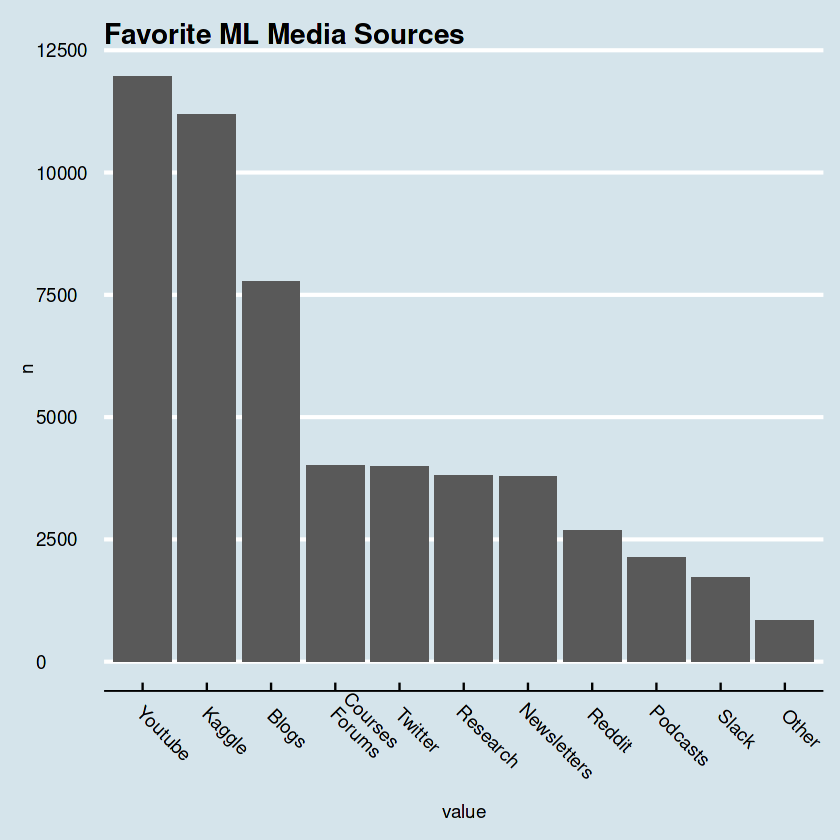

In [10]:
library(ggthemes)  
survey_data %>%
      select(starts_with("Q44")) %>%
      slice(-1) %>%
      mutate_if(is.character,as.factor) %>%
      gather("question_no", "value", na.rm=T) %>%
      count(value) %>%
      mutate(value = reorder(value,-n)) %>%
      mutate(value=recode(value, "Blogs (Towards Data Science, Analytics Vidhya, etc)" = "Blogs", 
                          "Course Forums (forums.fast.ai, Coursera forums, etc)" = "Courses\nForums",
                          "Email newsletters (Data Elixir, O'Reilly Data & AI, etc)" = "Newsletters",
                          "Journal Publications (peer-reviewed journals, conference proceedings, etc)" = "Research",
                          "Kaggle (notebooks, forums, etc)" = "Kaggle",
                          "Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)" = "Podcasts",
                          "Reddit (r/machinelearning, etc)" = "Reddit",
                          "Slack Communities (ods.ai, kagglenoobs, etc)" = "Slack",
                        "Twitter (data science influencers)" = "Twitter",
                          "YouTube (Kaggle YouTube, Cloud AI Adventures, etc)" = "Youtube")) %>%

filter(value != c("nan", "None")) %>%
ggplot(aes(x=value, y=n))+ geom_bar(stat="identity")+
theme_economist() + 
theme(axis.text.x= element_text(angle=315, hjust=.15))+
ggtitle("Favorite ML Media Sources")

                                

Warning message:
“attributes are not identical across measure variables;
they will be dropped”
Warning message in value != c("nan", "None"):
“longer object length is not a multiple of shorter object length”


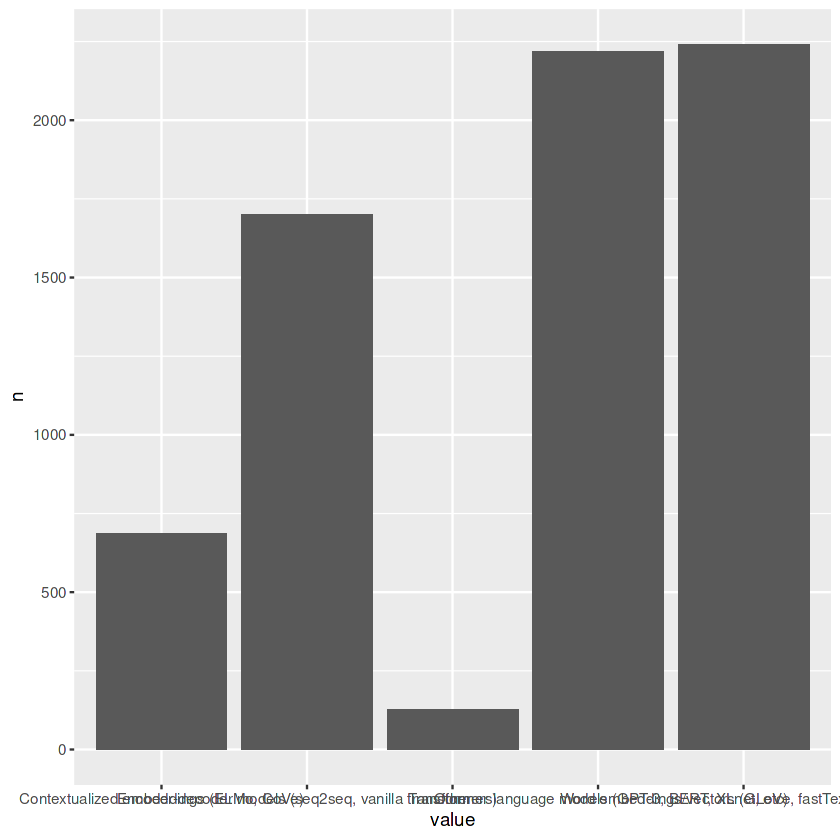

In [11]:
survey_data %>%
 select(starts_with("Q20")) %>%
 slice(-1) %>%
 mutate_if(is.character,as.factor) %>%
 gather("question_no", "value", na.rm=T) %>%
 count(value) %>%
filter(value != c("nan", "None")) %>%
ggplot(aes(x=value, y=n))+ geom_bar(stat="identity")